In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_path = 'smoke_data/Training/Training'
test_path = 'smoke_data/Testing/Testing'
valid_path = 'smoke_data/Validation/Validation'

In [3]:
def extract_from_path(path)-> []:
    full_path = []
    for i in sorted(os.listdir(path)):
        full_path.append(os.path.join(path, i))
    return full_path

In [4]:
train_images = extract_from_path(train_path)
test_images = extract_from_path(test_path)
valid_images = extract_from_path(valid_path)

In [7]:
train_images[:5]

['smoke_data/Training/Training/notsmoking_0001.jpg',
 'smoke_data/Training/Training/notsmoking_0002.jpg',
 'smoke_data/Training/Training/notsmoking_0003.jpg',
 'smoke_data/Training/Training/notsmoking_0005.jpg',
 'smoke_data/Training/Training/notsmoking_0007.jpg']

In [8]:
print(f"The length of train_images is {len(train_images)}")
print(f"The length of test_images is {len(test_images)}")
print(f"The length of valid_images is {len(valid_images)}")

The length of train_images is 716
The length of test_images is 224
The length of valid_images is 180


In [9]:
def createDataFrame(image_paths):
    labels = [path.split('/')[-1].split('_')[0] for path in image_paths]
    df = pd.DataFrame({'path': image_paths, 'label': labels})
    df['label_id'] = df['label'].apply(lambda x: 1 if x == 'smoking' else 0)
    return df

In [19]:
train_images_df = createDataFrame(train_images)
test_images_df = createDataFrame(test_images)
valid_images_df = createDataFrame(valid_images)

In [20]:
train_images_df.head()

path       label  label_id
0  smoke_data/Training/Training/notsmoking_0001.jpg  notsmoking         0
1  smoke_data/Training/Training/notsmoking_0002.jpg  notsmoking         0
2  smoke_data/Training/Training/notsmoking_0003.jpg  notsmoking         0
3  smoke_data/Training/Training/notsmoking_0005.jpg  notsmoking         0
4  smoke_data/Training/Training/notsmoking_0007.jpg  notsmoking         0

In [21]:
train_images_df.tail()

path    label  label_id
711  smoke_data/Training/Training/smoking_0550.jpg  smoking         1
712  smoke_data/Training/Training/smoking_0552.jpg  smoking         1
713  smoke_data/Training/Training/smoking_0554.jpg  smoking         1
714  smoke_data/Training/Training/smoking_0557.jpg  smoking         1
715  smoke_data/Training/Training/smoking_0560.jpg  smoking         1

In [29]:
def plotCount(df):
    name = df["path"][0].split("/")[3]
    smoking = df[df['label_id'] == 1]    
    print(f"Total images in {name} is {len(df)}")
    print(f"Total smoking images is {len(smoking)}")
    print(f"Total non-smoking images is {len(df)-len(smoking)}")
    sns.set_style("whitegrid")
    sns.countplot(x='label_id', data=df)

Total images in notsmoking_0001.jpg is 716
Total smoking images is 358
Total non-smoking images is 358


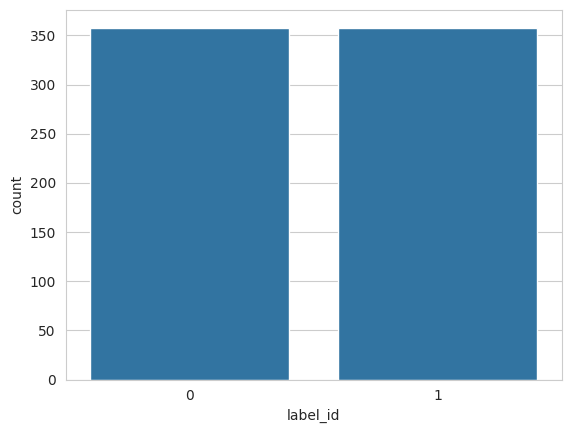

In [30]:
plotCount(train_images_df)

Total images in notsmoking_0004.jpg is 224
Total smoking images is 112
Total non-smoking images is 112


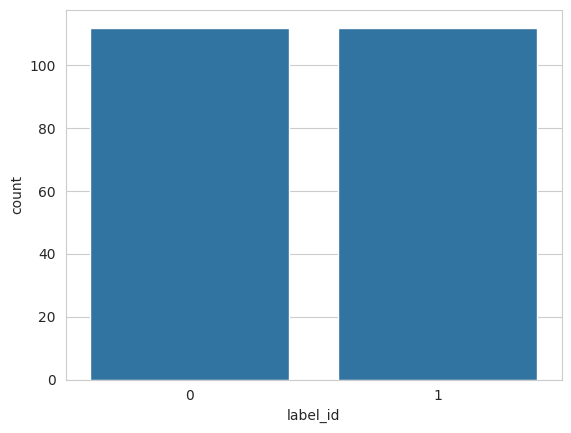

In [31]:
plotCount(test_images_df)

Total images in notsmoking_0006.jpg is 180
Total smoking images is 90
Total non-smoking images is 90


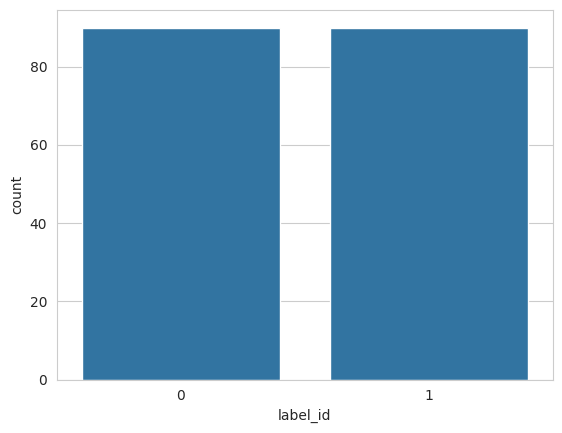

In [32]:
plotCount(valid_images_df)

### Preprocessing

In [33]:
train_images_df

path       label  label_id
0    smoke_data/Training/Training/notsmoking_0001.jpg  notsmoking         0
1    smoke_data/Training/Training/notsmoking_0002.jpg  notsmoking         0
2    smoke_data/Training/Training/notsmoking_0003.jpg  notsmoking         0
3    smoke_data/Training/Training/notsmoking_0005.jpg  notsmoking         0
4    smoke_data/Training/Training/notsmoking_0007.jpg  notsmoking         0
..                                                ...         ...       ...
711     smoke_data/Training/Training/smoking_0550.jpg     smoking         1
712     smoke_data/Training/Training/smoking_0552.jpg     smoking         1
713     smoke_data/Training/Training/smoking_0554.jpg     smoking         1
714     smoke_data/Training/Training/smoking_0557.jpg     smoking         1
715     smoke_data/Training/Training/smoking_0560.jpg     smoking         1

[716 rows x 3 columns]

In [34]:
import tensorflow as tf

2023-12-29 20:27:02.406829: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-29 20:27:02.406929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-29 20:27:02.504564: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-29 20:27:02.707107: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-29 20:27:04.060514: W tensorflow/compiler/tf2

In [35]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
SEED = 42

In [37]:
def imgPreProcessing(image, label):
    img = tf.io.read_file(image)
    img = tf.io.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img, size = (IMAGE_SIZE))
    return img, label
def loadDataset(df:pd.DataFrame):
    dataset = tf.data.Dataset.from_tensor_slices((df['path'], df['label_id']))
    return (dataset
                 .map(imgPreProcessing)
                .shuffle(BATCH_SIZE * 20)
                 .batch(BATCH_SIZE))

In [38]:
train_data = loadDataset(train_images_df)
test_data = loadDataset(test_images_df)
valid_data = loadDataset(valid_images_df)

In [39]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [63]:
# Visualize some random images from the training data

def plotRandom(data):
    for img,label in data.take(1):
        randomNum = random.randint(0, BATCH_SIZE - 1)
        text_label = "Smoking" if label[randomNum].numpy() == 1 else "Non-Smoking"
        plt.figure(figsize=(4, 4))
        plt.imshow(img[randomNum]/255.)
        plt.title(text_label)
        plt.axis('off') 
        plt.show()

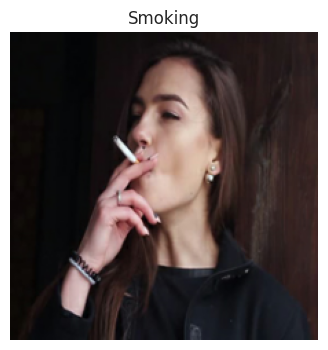

In [65]:
plotRandom(train_data)

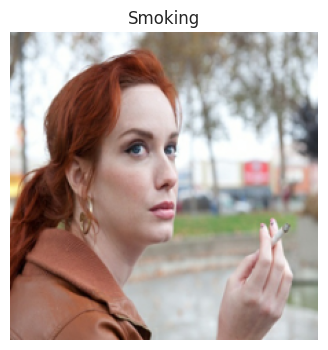

In [66]:
plotRandom(train_data)

### Fitting a baseline model on the dataset (EfficientNetB0)

In [67]:
def create_b0_base(lr:float = 0.001)->tf.keras.Model:
    model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
    model.trainable = False
    
    input_ = tf.keras.layers.Input(shape = IMAGE_SIZE + (3,), name = "input layer")
    x = model(input_)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    
    output = tf.keras.layers.Dense(2,activation = "sigmoid")(x)
    
    base_model = tf.keras.Model(input_,output)
    base_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(learning_rate = lr), metrics = ["accuracy"])
    return base_model

In [68]:
def plot_history(model_history):
    plt.style.use("seaborn-v0_8-whitegrid")
    df = pd.DataFrame(model_history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    loss = df['loss']
    accuracy = df['accuracy']
    val_loss = df['val_loss']
    val_accuracy = df['val_accuracy']
    epochs = range(len(df['val_loss']))

    # Plot loss
    ax1.plot(epochs, loss, label='training_loss')
    ax1.plot(epochs, val_loss, label='val_loss')
    ax1.legend()
    ax1.set_xlabel('Epochs')
    ax1.set_title("Loss")
    
    # Plot accuracy
    ax2.plot(epochs, accuracy, label='training_accuracy')
    ax2.plot(epochs, val_accuracy, label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.legend()
    ax2.set_title("Accuracy")
    
    # Adjust spacing and titles
    plt.tight_layout()
    plt.show()

In [69]:
base_eff0 = create_b0_base()
# fit the model
base_eff0_history = base_eff0.fit(train_data,epochs = 5, steps_per_epoch = len(train_data),validation_data = valid_data, validation_steps = len(valid_data))

24274472/24274472 [==============================] - 9s 0us/step
Epoch 1/5
23/23 [==============================] - 21s 684ms/step - loss: 0.5741 - accuracy: 0.7053 - val_loss: 0.3171 - val_accuracy: 0.9333
Epoch 2/5
23/23 [==============================] - 15s 661ms/step - loss: 0.3939 - accuracy: 0.8408 - val_loss: 0.2423 - val_accuracy: 0.9222
Epoch 3/5
23/23 [==============================] - 16s 680ms/step - loss: 0.3234 - accuracy: 0.8701 - val_loss: 0.2183 - val_accuracy: 0.9222
Epoch 4/5
23/23 [==============================] - 16s 685ms/step - loss: 0.2935 - accuracy: 0.8883 - val_loss: 0.1894 - val_accuracy: 0.9278
Epoch 5/5
23/23 [==============================] - 15s 664ms/step - loss: 0.2855 - accuracy: 0.8980 - val_loss: 0.2038 - val_accuracy: 0.9278


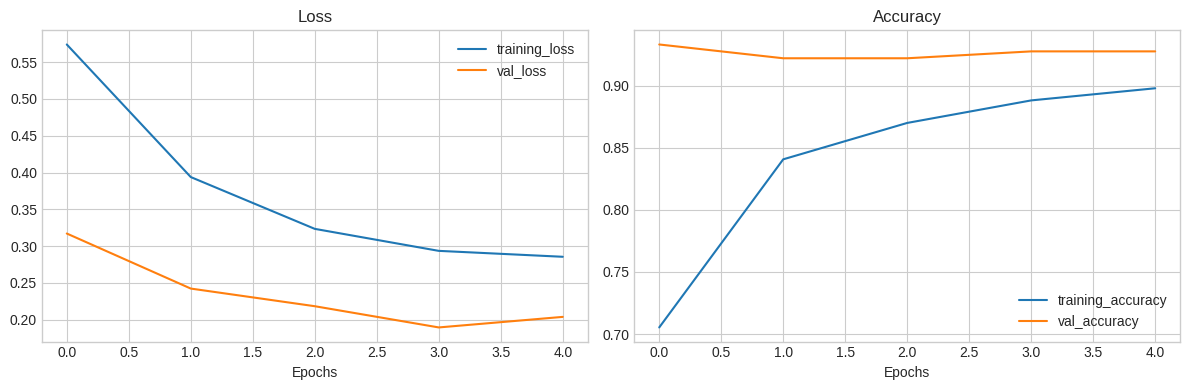

In [70]:
plot_history(base_eff0_history)

In [71]:
base_eff0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 5921874 (22.59 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


### Data Augmentaion

In [72]:
def augmentation(image, label):
    img = tf.image.random_flip_left_right(image, seed = SEED)
    img = tf.image.random_brightness(img, 0.1,seed = SEED)
    img = tf.image.random_contrast(img, 0.2, 0.5,seed = SEED)
    img = tf.image.random_saturation(img, .5, 1,seed = SEED)
    img = tf.image.random_hue(img, 0.2,seed = SEED)
    return img, label

def loadDatasetWithAugmentaion(df:pd.DataFrame):
    dataset = tf.data.Dataset.from_tensor_slices((df['path'], df['label_id']))
    return (dataset
                 .map(imgPreProcessing)
                 .map(augmentation)
                .shuffle(BATCH_SIZE * 20)
                 .batch(BATCH_SIZE)
           )

In [73]:
# Loading only 25 % for data augmentaion
data_size = len(train_images_df)
train_data_aug_20 = loadDatasetWithAugmentaion(train_images_df.sample(frac=1)[:int(0.25 * data_size)])

### Visulize the augmented images

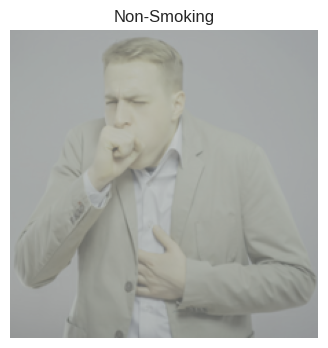

In [74]:
plotRandom(train_data_aug_20)

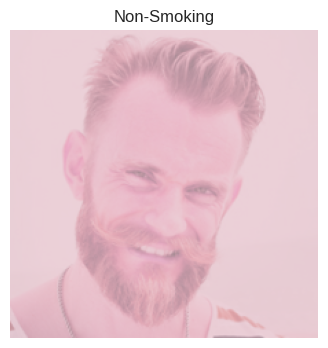

In [75]:
plotRandom(train_data_aug_20)

In [76]:
# create a checkpoint callback to save the model
checkpoint_path = "25_percent_augmented/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=True, # save only the best model weights instead of a model every epoch
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [77]:
base_eff_modelOne = create_b0_base()
initial_epochs = 5
# compile and fit
base_eff_modelOne.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(), metrics = ["accuracy"])
base_eff_modelOne_history = base_eff_modelOne.fit(
                                                    train_data_aug_20,epochs = initial_epochs, 
                                                    steps_per_epoch = len(train_data_aug_20),
                                                    validation_data = valid_data, 
                                                    validation_steps = len(valid_data),
                                                    callbacks = [checkpoint_callback]
                                                  )

Epoch 1/5
6/6 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.5754
Epoch 1: val_loss improved from inf to 0.52888, saving model to 25_percent_augmented/checkpoint.ckpt
6/6 [==============================] - 12s 1s/step - loss: 0.7092 - accuracy: 0.5754 - val_loss: 0.5289 - val_accuracy: 0.7500
Epoch 2/5
6/6 [==============================] - ETA: 0s - loss: 0.5729 - accuracy: 0.7151
Epoch 2: val_loss improved from 0.52888 to 0.43675, saving model to 25_percent_augmented/checkpoint.ckpt
6/6 [==============================] - 6s 1s/step - loss: 0.5729 - accuracy: 0.7151 - val_loss: 0.4368 - val_accuracy: 0.8611
Epoch 3/5
6/6 [==============================] - ETA: 0s - loss: 0.4875 - accuracy: 0.8045
Epoch 3: val_loss improved from 0.43675 to 0.37933, saving model to 25_percent_augmented/checkpoint.ckpt
6/6 [==============================] - 6s 1s/step - loss: 0.4875 - accuracy: 0.8045 - val_loss: 0.3793 - val_accuracy: 0.8889
Epoch 4/5
6/6 [======================

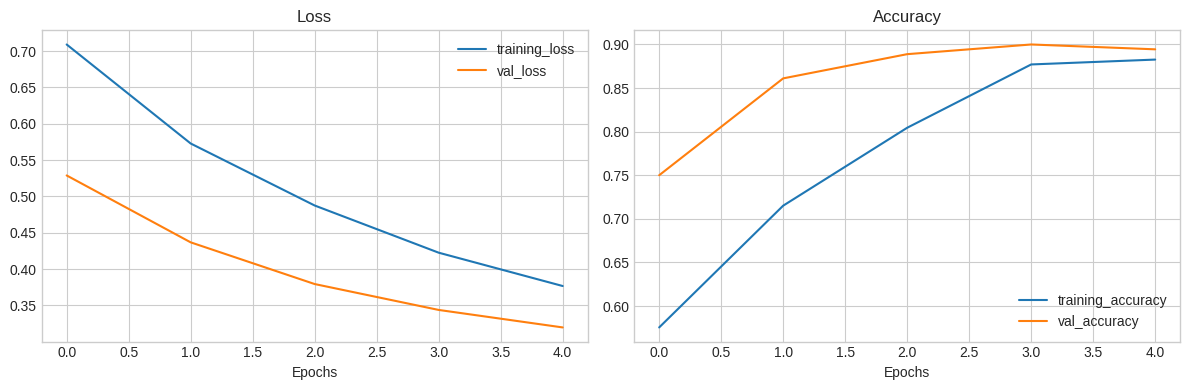

In [78]:
plot_history(base_eff_modelOne_history)

### Test results of the model

In [81]:
results_aug_25 = base_eff_modelOne.evaluate(test_data)
results_aug_25

7/7 [==============================] - 4s 488ms/step - loss: 0.3173 - accuracy: 0.9196


[0.31728047132492065, 0.9196428656578064]

### Load the weights from the pre-trained model 

In [82]:
base_eff_modelOne.load_weights(checkpoint_path)
base_loaded_weights = base_eff_modelOne.evaluate(test_data)
base_loaded_weights

7/7 [==============================] - 4s 497ms/step - loss: 0.3173 - accuracy: 0.9196


[0.31728047132492065, 0.9196428656578064]

### Fine Tuning

In [83]:
# create a new instance of the base model with lower learning rate
base_eff_modelTwo = create_b0_base(lr = 0.0001)
# Load the weights from the previous model chekpoint
base_eff_modelTwo.load_weights(checkpoint_path)

In [84]:
# Evaluate the test results to make sure they are same
base_eff_modelTwo.evaluate(test_data)

7/7 [==============================] - 6s 487ms/step - loss: 0.3173 - accuracy: 0.9196


[0.31728047132492065, 0.9196428656578064]

In [85]:
base_eff_modelTwo.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling2d_2  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 5921874 (22.59 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [86]:
print("Total trainable parameters in the model ", len(base_eff_modelTwo.trainable_variables))

Total trainable parameters in the model  2


In [87]:
for _,layer in enumerate(base_eff_modelTwo.layers):
    print("Layer no : ",_,"Trainable : ",layer.trainable, "Layer Name : ", layer.name,)

Layer no :  0 Trainable :  True Layer Name :  input layer
Layer no :  1 Trainable :  False Layer Name :  efficientnetv2-b0
Layer no :  2 Trainable :  True Layer Name :  global_average_pooling2d_2
Layer no :  3 Trainable :  True Layer Name :  dense_2


In [88]:
# Fine tune the EfficientNetB0 layer
base_eff_modelTwo_base = base_eff_modelTwo.layers[1]

In [89]:
base_eff_modelTwo_base.trainable = True
# Freeze all layers except for the last 10
for layer in base_eff_modelTwo_base.layers[:-10]:
    layer.trainable = False

In [90]:
for no,layer in enumerate(base_eff_modelTwo_base.layers):
    print("Layer no : ",no,"Trainable : ",layer.trainable, "Layer Name : ", layer.name,)  

Layer no :  0 Trainable :  False Layer Name :  input_3
Layer no :  1 Trainable :  False Layer Name :  rescaling_2
Layer no :  2 Trainable :  False Layer Name :  normalization_2
Layer no :  3 Trainable :  False Layer Name :  stem_conv
Layer no :  4 Trainable :  False Layer Name :  stem_bn
Layer no :  5 Trainable :  False Layer Name :  stem_activation
Layer no :  6 Trainable :  False Layer Name :  block1a_project_conv
Layer no :  7 Trainable :  False Layer Name :  block1a_project_bn
Layer no :  8 Trainable :  False Layer Name :  block1a_project_activation
Layer no :  9 Trainable :  False Layer Name :  block2a_expand_conv
Layer no :  10 Trainable :  False Layer Name :  block2a_expand_bn
Layer no :  11 Trainable :  False Layer Name :  block2a_expand_activation
Layer no :  12 Trainable :  False Layer Name :  block2a_project_conv
Layer no :  13 Trainable :  False Layer Name :  block2a_project_bn
Layer no :  14 Trainable :  False Layer Name :  block2b_expand_conv
Layer no :  15 Trainable :  F

In [91]:
print("Total trainable parameters in the model ", len(base_eff_modelTwo.trainable_variables))
# Initila 2 + now unfreeing 10 = 12

Total trainable parameters in the model  12


In [92]:
# recompiling the model
base_eff_modelTwo.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),metrics = ['accuracy'])
fine_tune_epochs = initial_epochs + 5
base_eff_modelTwo_history = base_eff_modelTwo.fit(train_data,epochs = fine_tune_epochs,
                                                  steps_per_epoch = len(train_data),
                                                  initial_epoch=base_eff_modelOne_history.epoch[-1],
                                                  validation_data = valid_data,
                                                  validation_steps = len(valid_data))     

Epoch 5/10
23/23 [==============================] - 23s 737ms/step - loss: 0.4360 - accuracy: 0.8045 - val_loss: 0.2713 - val_accuracy: 0.9111
Epoch 6/10
23/23 [==============================] - 16s 687ms/step - loss: 0.3629 - accuracy: 0.8687 - val_loss: 0.2400 - val_accuracy: 0.9111
Epoch 7/10
23/23 [==============================] - 16s 710ms/step - loss: 0.3211 - accuracy: 0.8939 - val_loss: 0.2135 - val_accuracy: 0.9111
Epoch 8/10
23/23 [==============================] - 17s 710ms/step - loss: 0.2865 - accuracy: 0.9022 - val_loss: 0.2018 - val_accuracy: 0.9222
Epoch 9/10
23/23 [==============================] - 16s 708ms/step - loss: 0.2618 - accuracy: 0.9134 - val_loss: 0.1877 - val_accuracy: 0.9278
Epoch 10/10
23/23 [==============================] - 17s 730ms/step - loss: 0.2391 - accuracy: 0.9204 - val_loss: 0.1776 - val_accuracy: 0.9278


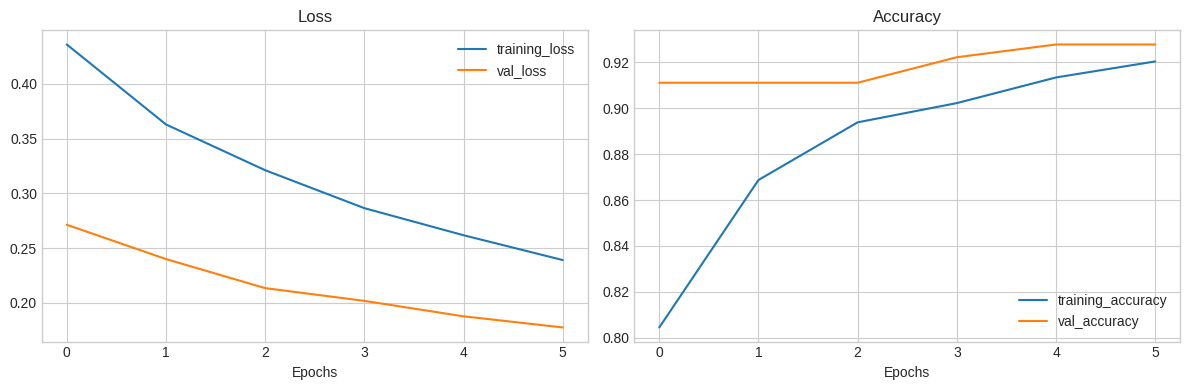

In [93]:
plot_history(base_eff_modelTwo_history)

### Finding the ideal learning rate with LearningRateScheduler callback**

In [94]:
base_eff_modelTwo.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(),metrics = ['accuracy'])
fine_tune_epochs = initial_epochs + 50
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
base_eff_modelTwo_history = base_eff_modelTwo.fit(train_data,epochs = fine_tune_epochs,
                                                  steps_per_epoch = len(train_data),
                                                  initial_epoch=base_eff_modelOne_history.epoch[-1],
                                                  validation_data = valid_data,
                                                  validation_steps = len(valid_data),
                                                  callbacks = [lr_scheduler]
                                                 )  

Epoch 5/55
23/23 [==============================] - 22s 725ms/step - loss: 0.2330 - accuracy: 0.9260 - val_loss: 0.1626 - val_accuracy: 0.9278 - lr: 1.5849e-04
Epoch 6/55
23/23 [==============================] - 16s 670ms/step - loss: 0.1880 - accuracy: 0.9469 - val_loss: 0.1526 - val_accuracy: 0.9500 - lr: 1.7783e-04
Epoch 7/55
23/23 [==============================] - 17s 741ms/step - loss: 0.1637 - accuracy: 0.9511 - val_loss: 0.1387 - val_accuracy: 0.9500 - lr: 1.9953e-04
Epoch 8/55
23/23 [==============================] - 18s 757ms/step - loss: 0.1459 - accuracy: 0.9567 - val_loss: 0.1358 - val_accuracy: 0.9500 - lr: 2.2387e-04
Epoch 9/55
23/23 [==============================] - 18s 753ms/step - loss: 0.1377 - accuracy: 0.9581 - val_loss: 0.1456 - val_accuracy: 0.9556 - lr: 2.5119e-04
Epoch 10/55
23/23 [==============================] - 17s 752ms/step - loss: 0.1228 - accuracy: 0.9721 - val_loss: 0.1332 - val_accuracy: 0.9500 - lr: 2.8184e-04
Epoch 11/55
23/23 [====================

Text(0.5, 1.0, 'Learning rate vs. loss')

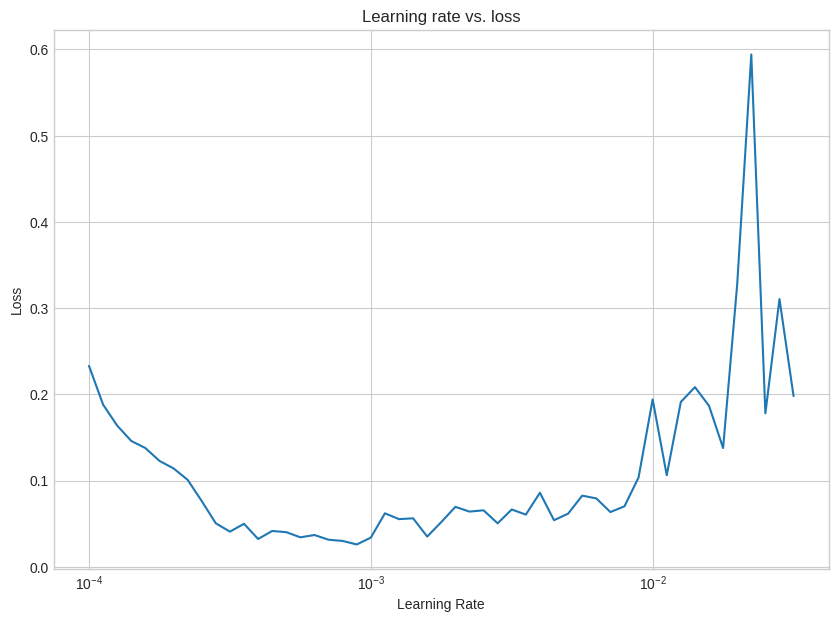

In [95]:
lrs = 1e-4 * (10 ** (np.arange(51)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, base_eff_modelTwo_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")

### Picking the best learning rate from the graph

In [96]:
Learning_rate = 1e-3
# recompiling the model with learning reate
base_eff_modelTwo.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = Learning_rate),metrics = ['accuracy'])
fine_tune_epochs = initial_epochs + 5
base_eff_modelThree_history = base_eff_modelTwo.fit(train_data,epochs = fine_tune_epochs,
                                                  steps_per_epoch = len(train_data),
                                                  initial_epoch=base_eff_modelOne_history.epoch[-1],
                                                  validation_data = valid_data,
                                                  validation_steps = len(valid_data))  

Epoch 5/10
23/23 [==============================] - 24s 794ms/step - loss: 0.0871 - accuracy: 0.9721 - val_loss: 0.3245 - val_accuracy: 0.9500
Epoch 6/10
23/23 [==============================] - 17s 728ms/step - loss: 0.0889 - accuracy: 0.9777 - val_loss: 0.3242 - val_accuracy: 0.9556
Epoch 7/10
23/23 [==============================] - 17s 735ms/step - loss: 0.0389 - accuracy: 0.9916 - val_loss: 0.3145 - val_accuracy: 0.9556
Epoch 8/10
23/23 [==============================] - 17s 714ms/step - loss: 0.0419 - accuracy: 0.9874 - val_loss: 0.3337 - val_accuracy: 0.9556
Epoch 9/10
23/23 [==============================] - 17s 713ms/step - loss: 0.0449 - accuracy: 0.9888 - val_loss: 0.3422 - val_accuracy: 0.9556
Epoch 10/10
23/23 [==============================] - 16s 709ms/step - loss: 0.0384 - accuracy: 0.9846 - val_loss: 0.3320 - val_accuracy: 0.9556


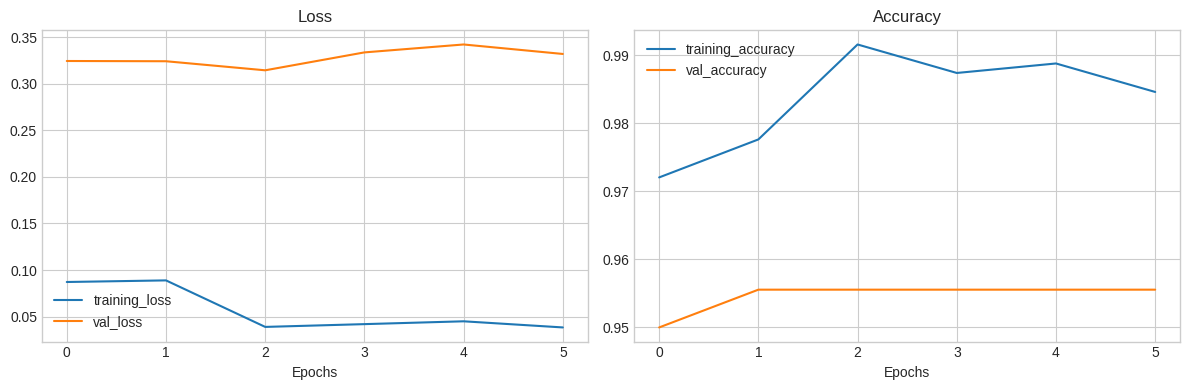

In [97]:
plot_history(base_eff_modelThree_history)

In [98]:
# Accuracy on the test model
base_eff_modelTwo.evaluate(test_data)

7/7 [==============================] - 3s 478ms/step - loss: 0.2900 - accuracy: 0.9420


[0.289972722530365, 0.9419642686843872]

### Test the model with a random image from the web

In [99]:
# Create a function to import an image and resize it to be able to be used with our model
from PIL import Image
from io import BytesIO
import requests
def plot_and_predict(url,img_shape = 224):
#     Download and preprocess
    response = requests.get(url)
    image_data = BytesIO(response.content)
    image = Image.open(image_data)
    image = image.convert("RGB")
    image = image.resize((img_shape, img_shape))
    image_array = np.array(image)
    
#     Make predictions
    img = np.expand_dims(image_array, axis=0)
    prediction = base_eff_modelTwo.predict(img,verbose = 0)
    predicted_label = np.argmax(prediction)
    
    print(f"Smoking with probability {prediction[0][1]*100}")
    print(f"Non-Smoking with probability {prediction[0][0]*100}")
    
    plt.imshow(image_array)
    plt.axis('off')
    plt.show

Smoking with probability 100.0
Non-Smoking with probability 3.056517712540785e-11


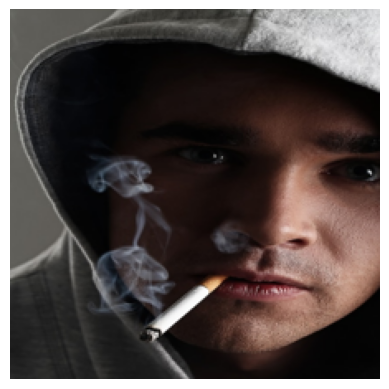

In [100]:
plot_and_predict('https://img.freepik.com/free-photo/young-man-smoking_144627-29295.jpg')

Smoking with probability 100.0
Non-Smoking with probability 1.1929321530601555e-06


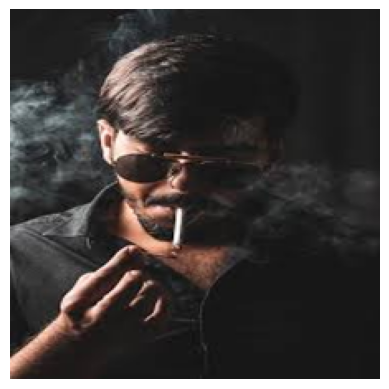

In [101]:
plot_and_predict('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQZ2FnaBLHoNCw4OM00db5ahJdvs_LXEo45OQ&usqp=CAU')

Smoking with probability 2.496245567293765e-12
Non-Smoking with probability 100.0


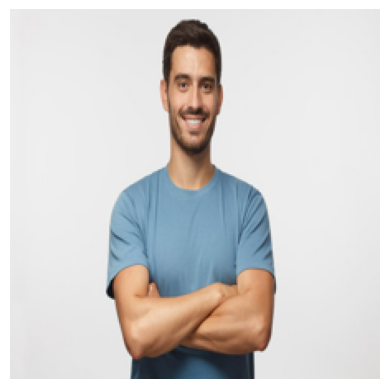

In [102]:
plot_and_predict('https://t4.ftcdn.net/jpg/02/24/86/95/360_F_224869519_aRaeLneqALfPNBzg0xxMZXghtvBXkfIA.jpg')

Smoking with probability 0.0003771826186493854
Non-Smoking with probability 99.99954104423523


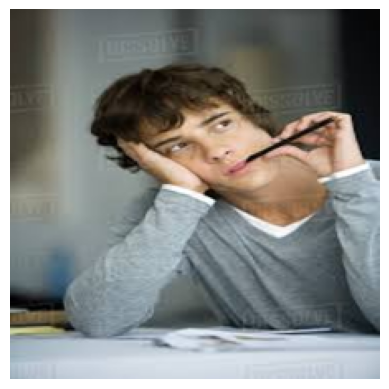

In [103]:
plot_and_predict("https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRY7f8d0V9xyQ37QTSgdDhFm6eZ15zdzoxYxw&usqp=CAU")

In [104]:
# Get the true and predicted labels for a class
y_true = []
y_pred = []
wrong_preds = []
for image, label in test_data.unbatch():
    img = np.expand_dims(image, axis=0)
    true_label = label.numpy()
    y_true.append(true_label)
    pred_prob = base_eff_modelTwo.predict(img,verbose = 0)
    predicted_label = np.argmax(pred_prob)
    y_pred.append(predicted_label)
    if(true_label != predicted_label):
        wrong_preds.append({"image" : image.numpy(), "true" :true_label, "pred":predicted_label })

In [105]:
# Plot accuracy on the test data_set 
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_true, y_pred)

print("Accuracy on the test dataset is",sklearn_accuracy)

Accuracy on the test dataset is 0.9419642857142857


In [106]:
print("Incorrect classifications",len(wrong_preds))

Incorrect classifications 13


### Confusion matrix

Text(0.5, 1.0, 'Confusion Matrix')

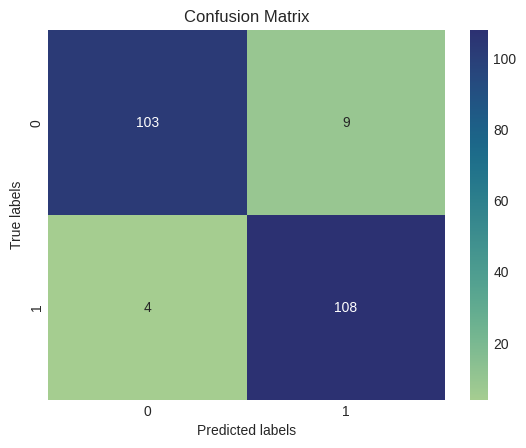

In [107]:
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_true, y_pred)
# Plot the confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="crest")
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [108]:
clf_report = classification_report(y_true, y_pred,target_names = ["non-smoking","smoking"])
print(clf_report)

              precision    recall  f1-score   support

 non-smoking       0.96      0.92      0.94       112
     smoking       0.92      0.96      0.94       112

    accuracy                           0.94       224
   macro avg       0.94      0.94      0.94       224
weighted avg       0.94      0.94      0.94       224



### Visualizing the incorrect classifications

In [109]:
def plot(x):
    image,true,pred = x['image'],x['true'],x['pred']
    true = "Smoking" if true == 1 else "Non-smoking"
    pred = "Smoking" if pred == 1 else "Non-smoking"
    title = f"True: {true}    Predicted : {pred}"
    plt.imshow(image/255.)
    plt.title(title)    
    plt.axis('off')
    plt.show
    plt.figure()

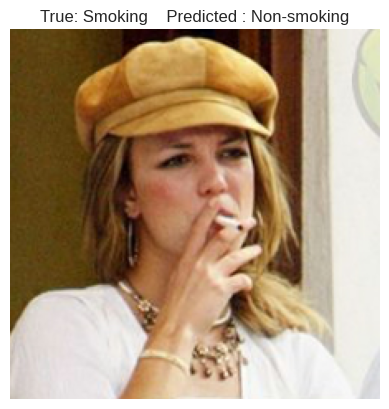

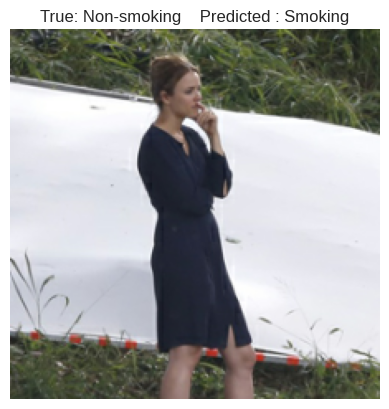

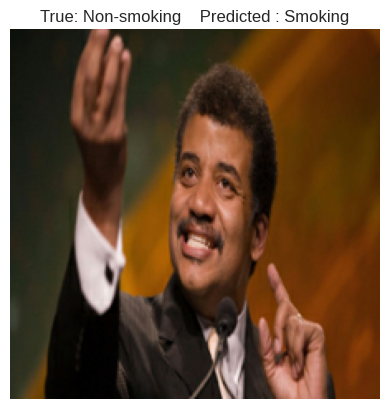

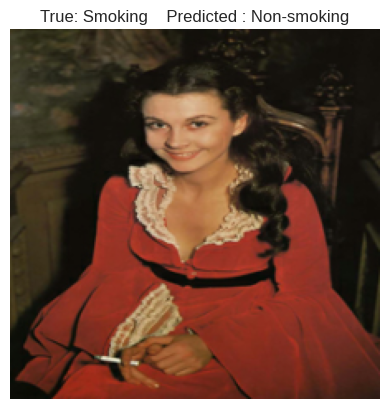

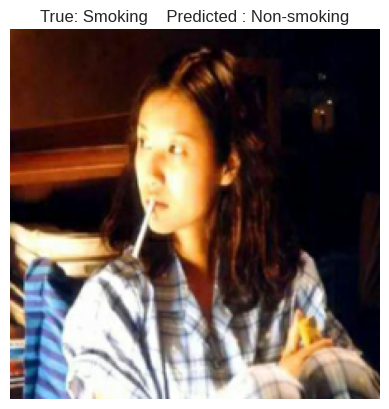

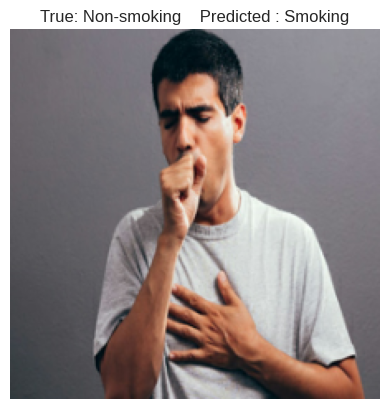

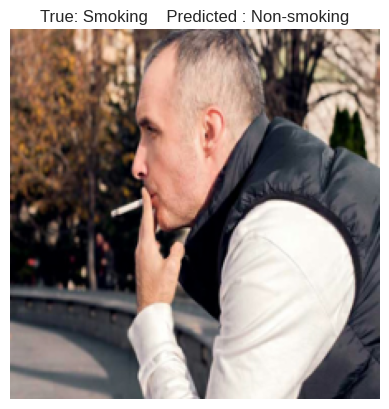

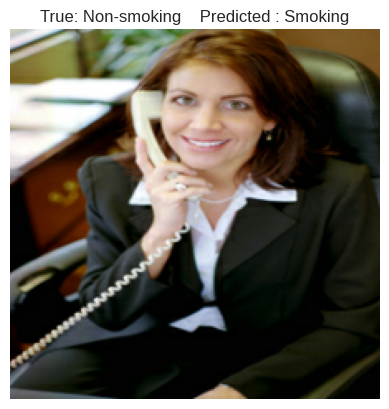

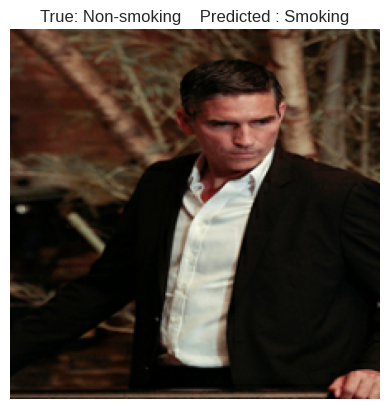

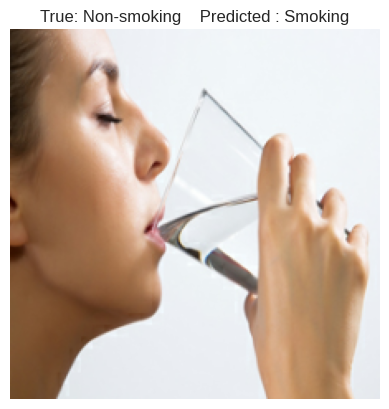

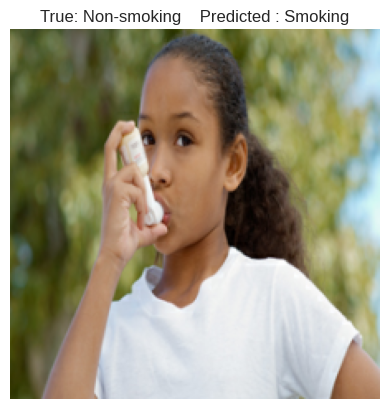

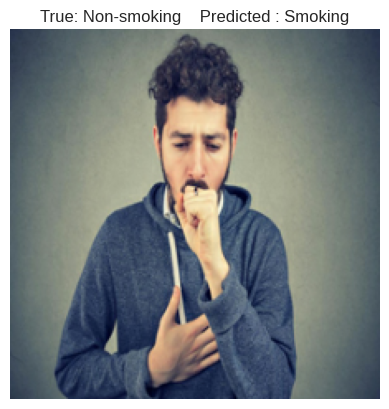

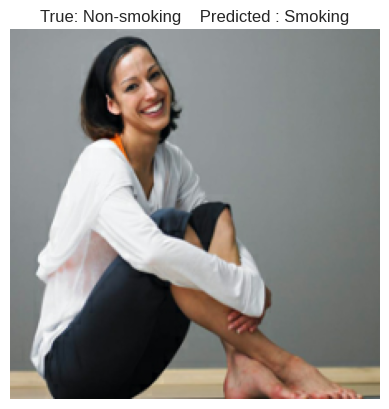

<Figure size 640x480 with 0 Axes>

In [110]:
for item in wrong_preds:
    plot(item)

In [113]:
tf.keras.models.save_model(
    base_eff_modelTwo,
    filepath="smoke_model.keras",
    overwrite=True,
    save_format=None
)

Smoking with probability 100.0
Non-Smoking with probability 1.1140626918377494e-20


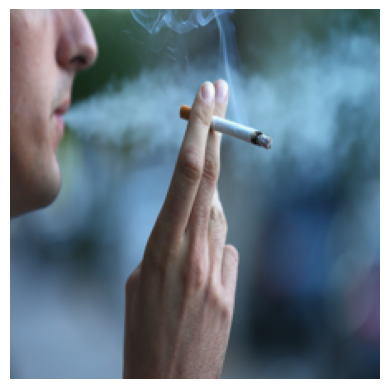

In [114]:
plot_and_predict("https://image.cnbcfm.com/api/v1/image/104388228-GettyImages-175127122_1.jpg?v=1576599446")

Smoking with probability 100.0
Non-Smoking with probability 6.95491976726928e-13


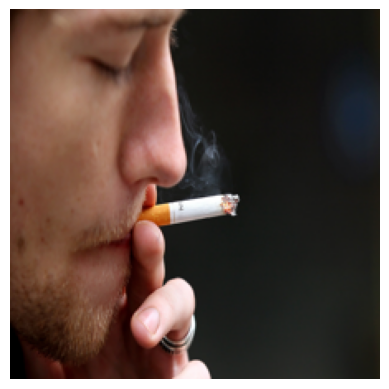

In [115]:
plot_and_predict("https://media-cldnry.s-nbcnews.com/image/upload/newscms/2016_44/828416/141230-smoking-cigarette-mn-1300.JPG")

Smoking with probability 99.28327202796936
Non-Smoking with probability 0.599947152659297


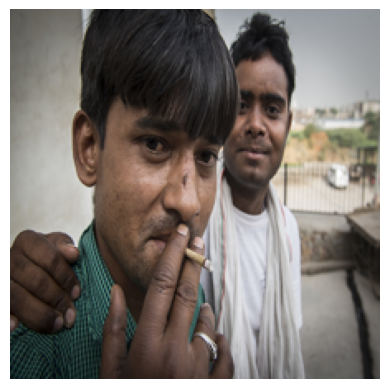

In [116]:
plot_and_predict("https://plan-uk.org/sites/default/files/Images/We%20are%20teaching%20young%20people%20to%20quit%20smoking%20with%20Astra%20Zeneca.jpg")